Resolviendo Sudoku con Programación Dinámica...


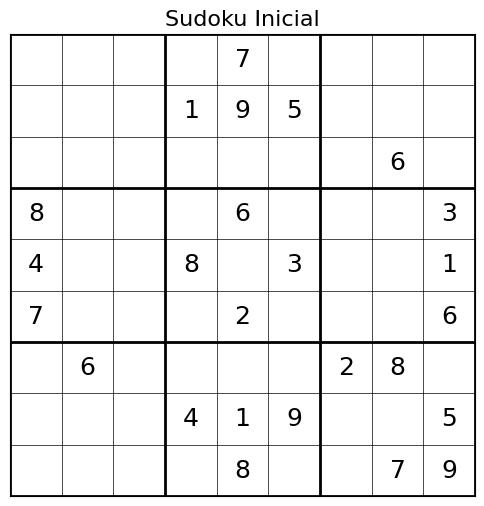

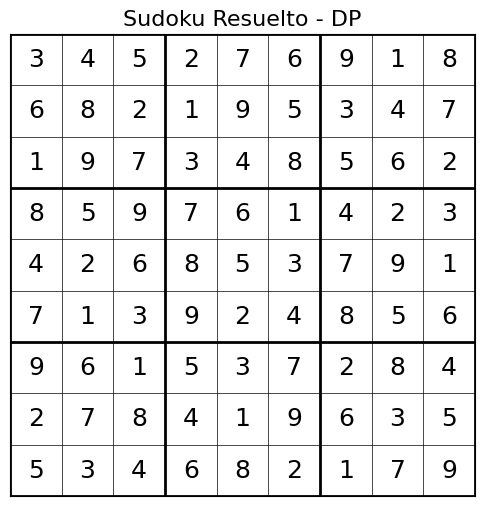

Tiempo de ejecución: 90.4778 segundos
Memoria usada: 597.48 KB


In [ ]:
import time # Para medir el tiempo de ejecución
import tracemalloc # Para rastrear el uso de memoria
import matplotlib.pyplot as plt  # Para graficar el tablero de Sudoku
import numpy as np # Para trabajar con arreglos numéricos, como el tablero de Sudoku

def imprimir_tablero_grafico(tablero, titulo="Sudoku"):
    """
    Imprime el tablero de Sudoku de manera gráfica usando matplotlib.
    Args:
        tablero: Una matriz de 9x9 que representa el estado actual del Sudoku.
        titulo: Título del tablero gráfico.
    """
    fig, ax = plt.subplots(figsize=(6, 6))  # Crear una figura gráfica de 6x6 pulgadas.
    ax.set_title(titulo, fontsize=16)  # Agregar el título al tablero.

    # Dibujar las líneas del tablero de 9x9.
    for i in range(10):
        lw = 2 if i % 3 == 0 else 0.5  # Líneas gruesas para subcuadros 3x3, finas para el resto.
        ax.plot([i, i], [0, 9], color='black', lw=lw)  # Líneas verticales.
        ax.plot([0, 9], [i, i], color='black', lw=lw)  # Líneas horizontales.

    # Insertar los números en el tablero.
    for i in range(9):
        for j in range(9):
            num = tablero[i, j]
            if num != 0:  # Solo dibujar si la celda no está vacía.
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=18, color='black')  # Centrar el texto en la celda.

    # Ajustar la vista y eliminar los ejes.
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mostrar el tablero gráfico.
    plt.show()

def solve_sudoku_dp(board):
    """
    Resuelve el Sudoku utilizando Programación Dinámica.
    Args:
        board: Matriz de 9x9 que representa el Sudoku a resolver.
    Returns:
        board: Matriz resuelta (si tiene solución).
    """
    # Conjuntos para mantener posibles números en filas, columnas y subcuadros.
    rows = [set(range(1, 10)) for _ in range(9)]  # Conjunto de números válidos por fila.
    cols = [set(range(1, 10)) for _ in range(9)]  # Conjunto de números válidos por columna.
    blocks = [set(range(1, 10)) for _ in range(9)]  # Conjunto de números válidos por subcuadro.

    # Inicializar los conjuntos eliminando números ya presentes en el tablero.
    for i in range(9):
        for j in range(9):
            if board[i][j] != 0:  # Si la celda no está vacía.
                num = board[i][j]
                rows[i].remove(num)
                cols[j].remove(num)
                blocks[(i // 3) * 3 + j // 3].remove(num)

    def is_valid(num, row, col):
        """
        Verifica si un número puede colocarse en una posición específica.
        Args:
            num: Número a verificar.
            row: Fila de la celda.
            col: Columna de la celda.
        Returns:
            bool: True si el número es válido, False en caso contrario.
        """
        block_idx = (row // 3) * 3 + col // 3
        return num in rows[row] and num in cols[col] and num in blocks[block_idx]

    def dp_solver():
        """
        Función recursiva que resuelve el Sudoku.
        Returns:
            bool: True si se encuentra una solución, False si no.
        """
        for row in range(9):
            for col in range(9):
                if board[row][col] == 0:  # Buscar la primera celda vacía.
                    block_idx = (row // 3) * 3 + col // 3
                    # Probar todos los números posibles en la celda.
                    for num in list(rows[row] & cols[col] & blocks[block_idx]):
                        board[row][col] = num
                        rows[row].remove(num)
                        cols[col].remove(num)
                        blocks[block_idx].remove(num)

                        if dp_solver():  # Llamada recursiva.
                            return True

                        # Deshacer cambios si la solución no es válida.
                        board[row][col] = 0
                        rows[row].add(num)
                        cols[col].add(num)
                        blocks[block_idx].add(num)

                    return False  # No se puede colocar ningún número válido.
        return True  # Sudoku completado.

    if not dp_solver():
        print("El Sudoku no tiene solución.")  # Mensaje si no se encuentra solución.
    return board

def measure_execution(func, board):
    """
    Mide el tiempo y memoria utilizados por una función.
    Args:
        func: Función a medir.
        board: Tablero de Sudoku.
    Returns:
        result: Resultado de la función.
        execution_time: Tiempo en segundos que tomó ejecutar la función.
        memory_used: Memoria máxima usada (en KB).
    """
    tracemalloc.start()  # Inicia el monitoreo de memoria.
    start_time = time.time()  # Marca el tiempo inicial.
    result = func(board)  # Ejecuta la función.
    end_time = time.time()  # Marca el tiempo final.
    current, peak = tracemalloc.get_traced_memory()  # Obtiene el uso de memoria.
    tracemalloc.stop()  # Detiene el monitoreo de memoria.

    execution_time = end_time - start_time  # Calcula el tiempo de ejecución.
    memory_used = peak / 1024  # Convierte el uso de memoria a KB.

    return result, execution_time, memory_used

# Ejemplo de uso
sudoku_board = np.array([
    [0, 0, 0, 0, 7, 0, 0, 0, 0],
    [0, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9],
])

print("Resolviendo Sudoku con Programación Dinámica...")
imprimir_tablero_grafico(sudoku_board, "Sudoku Inicial")  # Mostrar el tablero inicial.
solved_board, exec_time, mem_used = measure_execution(solve_sudoku_dp, sudoku_board)
imprimir_tablero_grafico(solved_board, "Sudoku Resuelto - DP")  # Mostrar el tablero resuelto.
print(f"Tiempo de ejecución: {exec_time:.4f} segundos")
print(f"Memoria usada: {mem_used:.2f} KB")
